# Numerical Optimization (CS215300) Assignment 1
## Introduction
In this assignment, we expect you to be familiar with optimization library, the numerical calculation package 'SciPy'. We are using the Rosenbrock function as the benchmark of our optimization algorithms. Rosenbrock is a simple fourth-order function has the minimal point at [1,1]. We provide a visualization function which draws the contour.
## Task
1. Please finish the TODO part, which you're going to read the document of SciPy and learn how to minimize function.
    You may refer the information in the following link:
    https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
2. Please apply SciPy library of the optimization algorithm of BFGS, Conjugate gradient, Modified Newton's method with conjugate gradient with the initilal guess [-2,2].
3. Gradient descent is not included in SciPy package, please implement "Gradient descent with optimal step length".
    Please refer page 11 of handout 2. 
4. Newton's method is not included in SciPy package, please implement "Pure Newton's method".
    Please refer page 18 of handout 2.
5. Write a concise report about:
    * Comparing the behavior of these algorithms, include the visualized plot, number of iterarions, step length etc.
    * How do you implement the Gradient descent and Newton's method algorithm 
    * Note: Write your report in the LAST cell of this notebook in Markdown Style. If you are new to Markdown, please check this tutorial link: https://www.markdowntutorial.com/ / Markdown syntax: https://www.markdownguide.org/basic-syntax/
6. Rename this notebook file with your student ID and upload it to eeclass platform. (ex. 107xxxxxx.ipynb)
    

## Import packages and visualization
If you imported extra packages, please mention in your report.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

In [2]:
def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2,2,1000)
    y = np.linspace(-1,3,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()

## BFGS

   0   -1.019941    2.244099
   1   -0.562813    0.735858
   2   -0.368272    0.186935
   3   -0.325033    0.072317
   4   -0.338151    0.108762
   5   -0.331556    0.100654
   6   -0.320085    0.089778
   7   -0.298778    0.072234
   8   -0.258109    0.042333
   9   -0.181445   -0.006175
  10   -0.148287   -0.014699
  11   -0.108112   -0.012894
  12    0.014004   -0.026627
  13    0.126835    0.008328
  14    0.186650    0.013728
  15    0.256267    0.042719
  16    0.341831    0.102971
  17    0.454086    0.185281
  18    0.540241    0.294494
  19    0.599379    0.350596
  20    0.645183    0.402149
  21    0.697248    0.472117
  22    0.754232    0.564077
  23    0.843675    0.696265
  24    0.846695    0.710274
  25    0.899237    0.805647
  26    0.942688    0.884484
  27    0.969078    0.939486
  28    1.000073    0.997736
  29    0.993803    0.986826
  30    0.996605    0.993112
  31    0.999038    0.998093
  32    0.999956    0.999917
  33    1.000001    1.000002
  34    1.0000

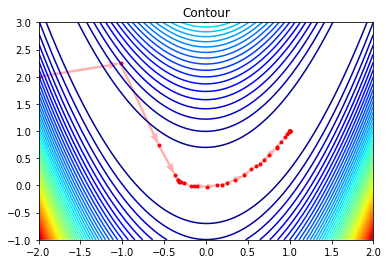

In [3]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)

#res=minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'disp': True} )

#print(res)

Nfeval=0

def callbackFunc(X):
    global Nfeval, x_iter
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}'.format(Nfeval, X[0], X[1]))
    Nfeval += 1
    x_iter.append([X[0], X[1]])
    
res=minimize(rosen, x0, args=(), method='BFGS', jac=rosen_der, callback=callbackFunc , options={'disp': True} )

x_iter.insert(0,x0)



visualize(x_iter)

## Conjugate Gradient

  35   -1.455887    2.135520
  36   -1.423085    2.008506
  37   -1.408608    1.996354
  38   -1.132863    1.247778
  39   -1.002291    0.953525
  40   -0.934643    0.871685
  41   -0.928486    0.872189
  42   -0.714235    0.477708
  43   -0.586560    0.298614
  44   -0.525881    0.277394
  45   -0.509547    0.276436
  46   -0.261293    0.039222
  47   -0.163613   -0.022191
  48    0.024532   -0.044349
  49    0.032433    0.002695
  50    0.187042    0.010105
  51    0.293193    0.054028
  52    0.319910    0.102131
  53    0.399896    0.144887
  54    0.517418    0.245590
  55    0.589566    0.350543
  56    0.631057    0.390390
  57    0.668962    0.434662
  58    0.777659    0.593316
  59    0.773830    0.597996
  60    0.862033    0.736320
  61    0.955586    0.919664
  62    0.985196    0.971862
  63    0.985726    0.971607
  64    0.985842    0.971730
  65    1.000188    1.000364
  66    1.000183    1.000366
  67    1.000000    1.000000
  68    1.000000    1.000000
Optimization t

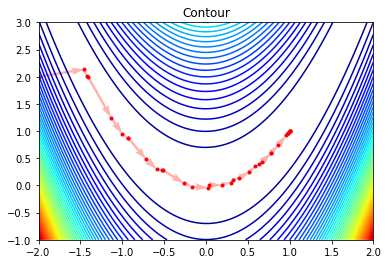

In [4]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)
res=minimize(rosen, x0, args=(), method='CG', jac=rosen_der, callback=callbackFunc , options={'disp': True} )

x_iter.insert(0,x0)

visualize(x_iter)

## Gradient Descent with optimal step length

In [5]:
from scipy.optimize import fmin

In [6]:
def Gradient_Descent(Grad, x, epsilon=0.0001, nMax =100):
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments:
        # x_iter: a list which contains new x for each step of iteration
        # step_length: a list which contains the optimal step length for each step of iteration
        # iter_count: an integer, the number of iteration the algorithm taken to convergence
    x_iter = [x0]
    t = 0.0001
    # count = 0
    step_length = [t]
    iter_count = 1
    while np.linalg.norm(Grad(x)) > epsilon and iter_count < nMax:
        print('iter:',iter_count)
        def R1(t):
            return rosen(x - t*rosen_der(x))
        new_t = fmin(R1,10)[0]
        print('new_t:',new_t)
        
        x = x - new_t * rosen_der(x)
        x_iter.append(x)
        print('x:',x)
        
        step_length.append(new_t)
        t = new_t
        iter_count = iter_count+1
        print('x_diff:',np.linalg.norm(Grad(x)),'\n')
    
    return x_iter, iter_count, step_length

iter: 1
Optimization terminated successfully.
         Current function value: 0.503584
         Iterations: 30
         Function evaluations: 62
new_t: 0.002309560775756836
x: [1.70915461 2.92382431]
x_diff: 0.640252097060554 

iter: 2
Optimization terminated successfully.
         Current function value: 0.503453
         Iterations: 21
         Function evaluations: 42
new_t: 0.00067138671875
x: [1.70940259 2.9234732 ]
x_diff: 0.5322121611502952 

iter: 3
Optimization terminated successfully.
         Current function value: 4.326808
         Iterations: 18
         Function evaluations: 36
new_t: 6.1875
x: [-1.07874597  1.17119187]
x_diff: 1.7603708467582535 

iter: 4
Optimization terminated successfully.
         Current function value: 2.291292
         Iterations: 21
         Function evaluations: 42
new_t: 0.6329345703125
x: [-0.49537757  0.22191742]
x_diff: 8.971091999548076 

iter: 5
Optimization terminated successfully.
         Current function value: 2.183365
         Iter

Optimization terminated successfully.
         Current function value: 0.000034
         Iterations: 21
         Function evaluations: 42
new_t: 0.0010986328125
x: [0.99419468 0.98840343]
x_diff: 0.005467368488972831 

iter: 77
Optimization terminated successfully.
         Current function value: 0.000034
         Iterations: 21
         Function evaluations: 42
new_t: 0.01116943359375
x: [0.99423719 0.98844727]
x_diff: 0.017343257711668728 

iter: 78
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 21
         Function evaluations: 42
new_t: 0.0010986328125
x: [0.9942235  0.98846052]
x_diff: 0.005400214988865879 

iter: 79
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 21
         Function evaluations: 42
new_t: 0.01312255859375
x: [0.99427157 0.98851259]
x_diff: 0.018691147644706356 

iter: 80
Optimization terminated successfully.
         Current function value: 0.000033
      

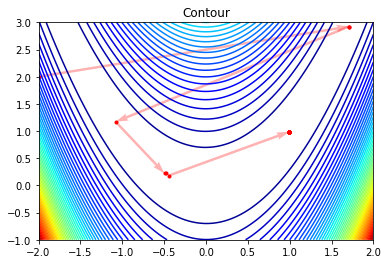

In [7]:
x0 = np.array([-2,2])
x_iter, iter_count, step_length = Gradient_Descent(rosen_der,x0)
print('Iteration Count: %d\n' % iter_count)
visualize(x_iter)

In [8]:
x_iter

[array([-2,  2]),
 array([1.70915461, 2.92382431]),
 array([1.70940259, 2.9234732 ]),
 array([-1.07874597,  1.17119187]),
 array([-0.49537757,  0.22191742]),
 array([-0.47438368,  0.2348162 ]),
 array([-0.44461199,  0.1815906 ]),
 array([0.99304001, 0.98605159]),
 array([0.99302176, 0.98606848]),
 array([0.99307513, 0.98612438]),
 array([0.99305812, 0.98614061]),
 array([0.99311554, 0.98620258]),
 array([0.99309754, 0.98621925]),
 array([0.99315031, 0.98627456]),
 array([0.99313351, 0.9862906 ]),
 array([0.9931903 , 0.98635189]),
 array([0.99317249, 0.98636839]),
 array([0.99322445, 0.98642279]),
 array([0.9932079 , 0.98643861]),
 array([0.9932643 , 0.98649955]),
 array([0.99324661, 0.9865159 ]),
 array([0.99329783, 0.98656938]),
 array([0.99328148, 0.98658502]),
 array([0.99333726, 0.98664529]),
 array([0.99331976, 0.98666147]),
 array([0.99337019, 0.98671408]),
 array([0.99335409, 0.98672951]),
 array([0.99340922, 0.98678915]),
 array([0.99339195, 0.98680513]),
 array([0.99344181, 0.

## Pure Newton's Method

In [9]:
#def Newton(Grad, Grad2, x, epsilon=0.00001, nMax = 10000 ):
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # Grad2: the second derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments: (same as above)
    # Hint: Use numpy.linalg to compute the inverse of a matrix
   # return x_iter, iter_count, step_length


def Newton(Grad, Grad2, x, epsilon=0.00001, nMax = 55):
    #Initialization
    i = 0
    x_iter = []
    iter_count = []
    error = 1
    
    while np.linalg.norm(error) > epsilon and i < nMax:
        i = i+1
        x_iter.append([x[0], x[1]])
        iter_count.append(i)    
        
        x_prev = x
        x = x - np.linalg.inv(Grad2(x)) @ Grad(x)
        error = x - x_prev

          
    return x_iter, iter_count

[1, 2, 3, 4, 5, 6]
[[-2, 2], [-1.9925187032418954, 3.9700748129675816], [0.9668726904159102, -7.823154621383788], [0.9668915922299773, 0.9348793507677424], [0.9999999976342167, 0.9989038287600219], [0.9999999995746027, 0.9999999991492055]]


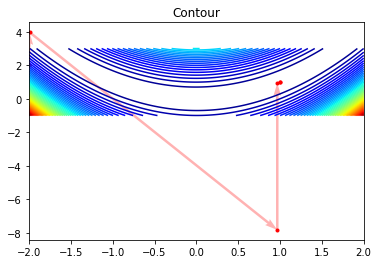

In [10]:
x0 = np.array([-2,2])
x_iter, iter_count = Newton(rosen_der,rosen_hess,x0)
print(iter_count)
print(x_iter)
#print('Iteration Count: %d\n' % iter_count)
#print(f'Iteration Count: {iter_count}\n')
#print(f'x: {x_iter}\n')

x_iter.insert(0,x0)

visualize(x_iter)

## Modified Newton's method with conjugate gradiet (Newton-CG)

  69   -1.613492    2.096266
  70   -1.478878    2.137325
  71   -1.461386    2.142387
  72   -1.455512    2.134342
  73   -1.458010    2.132505
  74   -1.452356    2.124923
  75   -1.454788    2.123096
  76   -1.449327    2.115919
  77   -1.451701    2.114100
  78   -1.446412    2.107280
  79   -1.448733    2.105467
  80   -1.443597    2.098966
  81   -1.445870    2.097158
  82   -1.440873    2.090942
  83   -1.443102    2.089138
  84   -1.438230    2.083181
  85   -1.440418    2.081379
  86   -1.435662    2.075657
  87   -1.437812    2.073857
  88   -1.433161    2.068349
  89   -1.435276    2.066551
  90   -1.430722    2.061239
  91   -1.432805    2.059441
  92   -1.428340    2.054312
  93   -1.430392    2.052514
  94   -1.426010    2.047553
  95   -1.428034    2.045753
  96   -1.423729    2.040949
  97   -1.425727    2.039148
  98   -1.421494    2.034489
  99   -1.423466    2.032686
 100   -1.419300    2.028164
 101   -1.421248    2.026359
 102   -1.417146    2.021964
 103   -1.4190

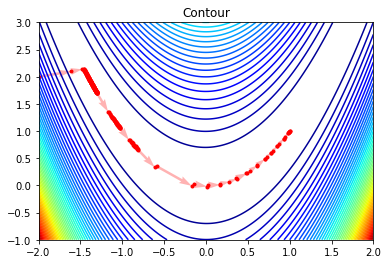

In [11]:
x0 = np.array([-2,2])
x_iter = list()
## TODO (HINT:You will need to feed in rosen_hess in this optimize function)
res=minimize(rosen, x0, args=(), method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=callbackFunc , options={'disp': True} )
x_iter.insert(0,x0)
visualize(x_iter)

## Report

Among the all algorithms mentioned above, **Pure Newton's method** did the best job to find the minimum point of the rosenbrock function.

The reason is that Pure newton's method used second order information (or Hessian Matrix) to find the step length. The benefit of using hessian matrix is that you can converge faster to local minimum. However, in pure newton's method we need to compute hessian and also its inverse. So, computational complexity of this algoirhm is very higher than other algorithm.

The other algorithm which was implemneted by us is Gradient descent method with the optimal step length. This algorithm fails to find the local minimum of this function accurately. The reason is that, it used just only first order derivation and moreover, in rosenbrock function, the neighbors of minimum is the flat and there are a lot of valleys on this side. So, using gradient descent even with the optimal step length is not very good choice to find local minimum for rosenbrock function.

Moreover, by step length, we can see that this algorithm followed a zig-zag pattern and has a long jump in some cases. However, in Newton's method it seems that step length is far better since it used hessian matrix.

Moreover, we observed that inital guess is playing a key role to convergence of this algorithm. Although our initial guess is relatively good, the algorithm was unable to find local minimum excatcly. The remedy of this problem maybe is using line search algorithm to find optimal step length can be good choice. For example, using Backtracking line search and checking it with a some loose conditions such as Armijo-Goldstein.

As long as gradient information is available, we can initialize BFGS with the identity matrix and then just calculate the rank-two updates to the approximation Hessian. BFGS is a quasi-Newton approach and has a lower tendency to become "stuck," requiring minor algorithmic adjustments to accomplish significant descent for each iteration.

Conjugate Gradient, on the other hand, necessitates matrix-vector products, which you may find beneficial if you can calculate directional derivatives. Because calculating a directional derivative with finite differences is far less expensive than calculating a Hessian with finite differences, if you choose to build your method with finite differences, just calculate the directional derivative directly. This discovery, however, does not applicable to BFGS, which calculates approximate Hessians using gradient information's inner products.

For the class of quadratic functions, the conjugate gradient algorithm uses a direction expressed in terms of the current gradient and the previous direction at each iteration by ensuring that the directions are mutually A-conjugate, where A is a positive definite
symmetric n × n matrix. The conjugate gradient method also exhibits fast convergence property for non-quadratic problems like
rosenbrock function. In this case, maybe scipy optimizer use the Fletcher-Reeves Formula or other kinds of formulation to face the issue.

In term of rosenbrock function, we can see that number of iterations is roughly same between CG and BFGS (however, in CG number of iteration is 34 and for BFGS is 35, but function evaluation of CG is higher)

The conjugate gradient algorithm behaves far better than the simple gradient, but it seems the BFGS followed the Rosenbrock valley better. A good quasi-Newton can be really efficient, although a conjugate gradient can be enough in some cases.

I am really surprised to see the performance of Newton-CG in the rosenbrock function. It can find the local minimum accurately however, comparing to BFGS and CG, it requires more iterations and function evaluation although it has information aboud hessian matrix.

I think because Newton-CG calculates this inverse Hessian explicitly, hence it's longer time requirements. The quasi-Newton methods like BFGS acalculate an approximation to the Hessian (i.e., the curvature) based on the gradient, which is cheaper on time, and which is also supposedly a better estimate of the curvature about a point. Thus, for quadratic functions, Newton-CG converges faster, whereas for non-quadratic functions (rosenbrock), the quasi-Newton functions converge better.

**How to implement the Gradient Descent with Optimal step length?**
I implemented this algorithm using steepest descent method in slide and also in forum discussion. I defined the two stopping criteria such that if norm(gradient) is less than epsilon, the process is terminated or number of iterations exceed nmax. Furthermore, for finding optmial step length, I implemented the algorithm in forum discussion and slide and implement \phi function and find it minimum at each iteration by fmin function in scipy library. It is interesting that choosing initiall guess for fmin is also critical and choosing 10 seems the best choice.

**How to implement Pure Newton's method?**
For implementing this algorithm, I just used our slide. Again I define two criteria for stopping the process (number of iteration and norm(error)). This algorithm is iterative one and however each step is equal to np.linalg.inv(Grad2(x)) @ Grad(x).